# Import libraries and sql data

In [1]:
import pandas as pd 
import numpy as np
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import time
import matplotlib.pyplot as plt

In [2]:
result = load_dotenv('env.env')

if result:
    print(".env file loaded successfully.")
else:
    print(".env file not found or couldn't be loaded.")

db_host = str(os.getenv('DB_HOST'))
db_password = str(os.getenv('DB_PASSWORD'))
db_schema = str(os.getenv('DB_SCHEMA'))

print("DB Host:", db_host)
print("DB Password:", db_password)
print("DB Schema:", db_schema)

engine_path = 'mysql+pymysql://root:' + db_password + '@' + db_host + '/' + db_schema

.env file loaded successfully.
DB Host: localhost
DB Password: #S4N4four.O
DB Schema: mco1


In [3]:
engine = create_engine(engine_path)

In [4]:
connection = engine.connect()

In [5]:
query = "SELECT * FROM mco1.doctors"
start_time = time.time()
df = pd.read_sql_query(query, connection)
elapsed_time = time.time() - start_time

print(df)
print(f"Time taken to fetch data: {elapsed_time} seconds")

                               doctorid              mainspecialty  age
0      00003E3B9E5336685200AE85D21B4F5E          Internal Medicine   37
1      0002AC0D783338CFEAB0B2BDBD872CDA          General Physician   29
2      0004D0B59E19461FF126E3A08A814C33  Obstetrics and Gynecology   51
3      00053F5E11D1FE4E49A221165B39ABC9          Internal Medicine   42
4      0007789B118E4710FC0E7C8758A6532A                Dermatology   35
...                                 ...                        ...  ...
15371  FFEC39090FA0C85692730FDBD647E34D                    Surgery   33
15372  FFEED84C7CB1AE7BF4EC4BD78275BB98          Internal Medicine   45
15373  FFF375790D1D509387E4F04A68FC401C       General Practitioner   27
15374  FFFCC1A3964B4AD665FA2F07D7BFD086       General Practitioner   31
15375  FFFFFE98D0963D27015C198262D97221           General Medicine   29

[15376 rows x 3 columns]
Time taken to fetch data: 0.277435302734375 seconds


# Roll-Up: Count of appointments per region, province, city

In [6]:
query = """
    SELECT
        c.RegionName,
        c.Province,
        c.City,
        COUNT(*) AS appointment_count
    FROM appointments a
    JOIN clinics c ON a.clinicid = c.clinicid
    GROUP BY c.RegionName, c.Province, c.City WITH ROLLUP;
"""
start_time = time.time()
OLAP_Query_1 = pd.read_sql_query(query, connection)
elapsed_time = time.time() - start_time

print(OLAP_Query_1.head(50))
print(f"Time taken to fetch data: {elapsed_time} seconds")

                              RegionName         Province             City  \
0                       Bicol Region (V)            Albay     Legazpi City   
1                       Bicol Region (V)            Albay           Manito   
2                       Bicol Region (V)            Albay             None   
3                       Bicol Region (V)             None             None   
4                      CALABARZON (IV-A)           Cavite      Bacoor City   
5                      CALABARZON (IV-A)           Cavite  Dasmariñas City   
6                      CALABARZON (IV-A)           Cavite             None   
7                      CALABARZON (IV-A)           Laguna     Calamba City   
8                      CALABARZON (IV-A)           Laguna  Santa Rosa City   
9                      CALABARZON (IV-A)           Laguna             None   
10                     CALABARZON (IV-A)             None             None   
11                   Central Luzon (III)          Bulacan     Ma

In [7]:
OLAP_Query_1['Index'] = OLAP_Query_1['RegionName'] + ', ' + OLAP_Query_1['Province'].fillna('') + ', ' + OLAP_Query_1['City'].fillna('')

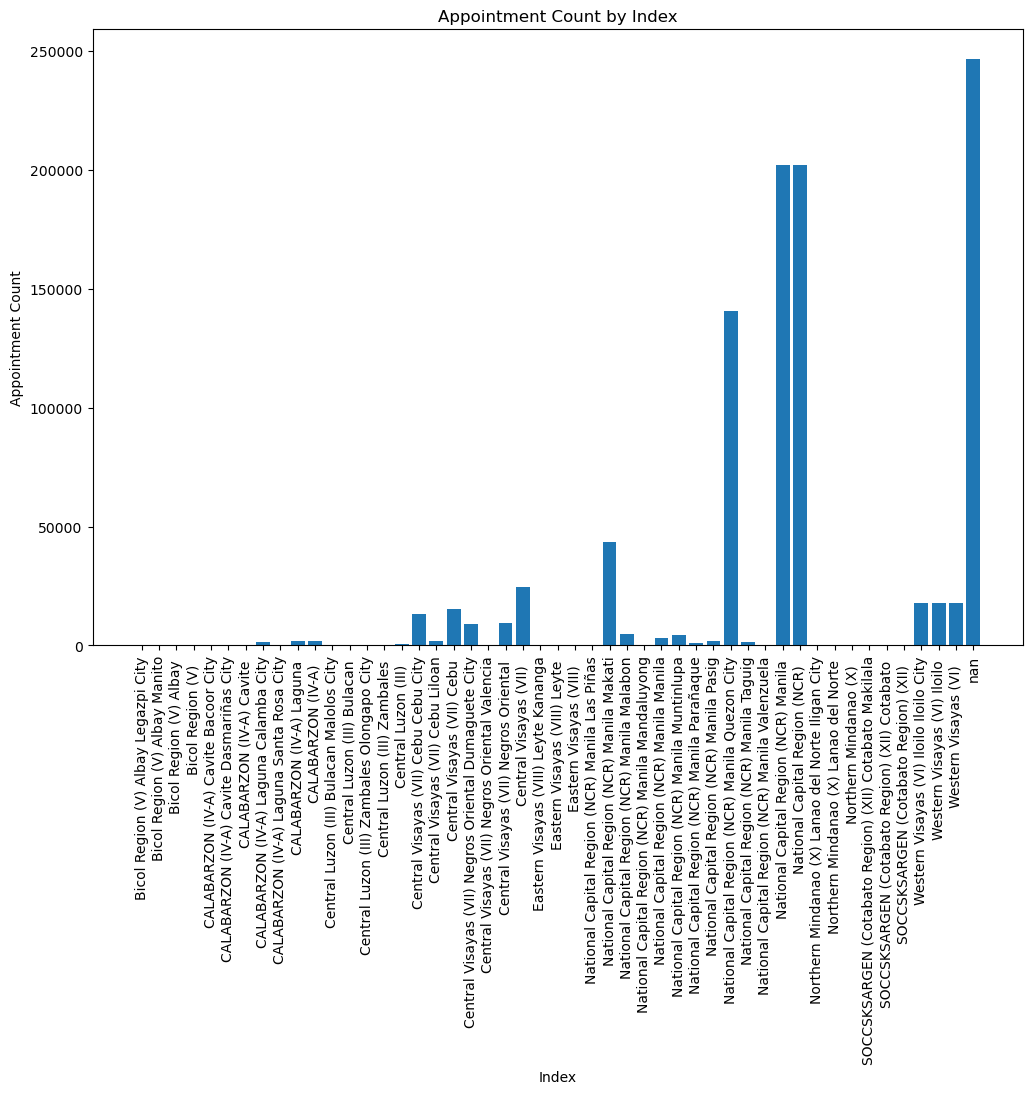

In [8]:
plt.figure(figsize=(12, 8))
plt.bar(range(len(OLAP_Query_1)), OLAP_Query_1['appointment_count'])
plt.xticks(range(len(OLAP_Query_1)), OLAP_Query_1['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for all entries')
plt.show()

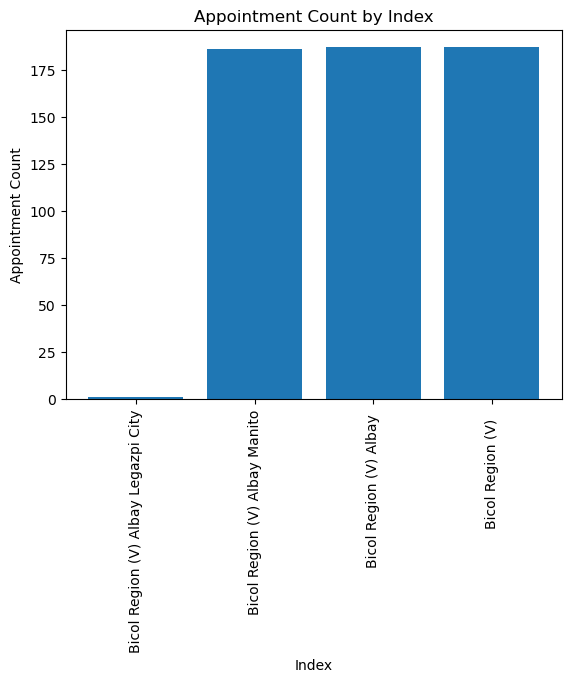

In [9]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'Bicol Region (V)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for the Bicol Region only')
plt.show()

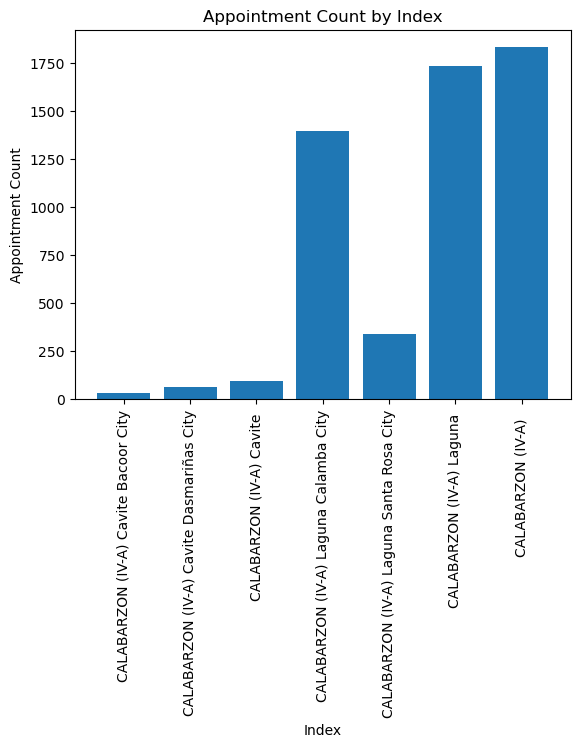

In [11]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'CALABARZON (IV-A)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for CALABARZON only'))
plt.show()

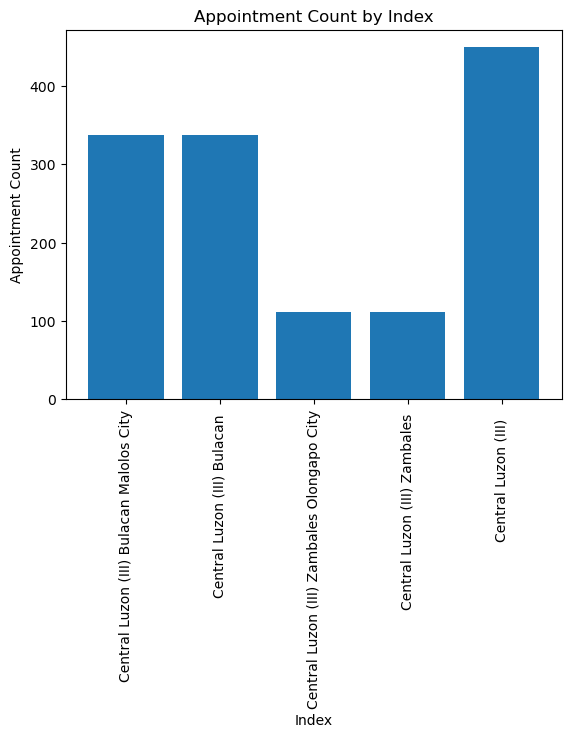

In [10]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'Central Luzon (III)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for Central Luzon only')
plt.show()

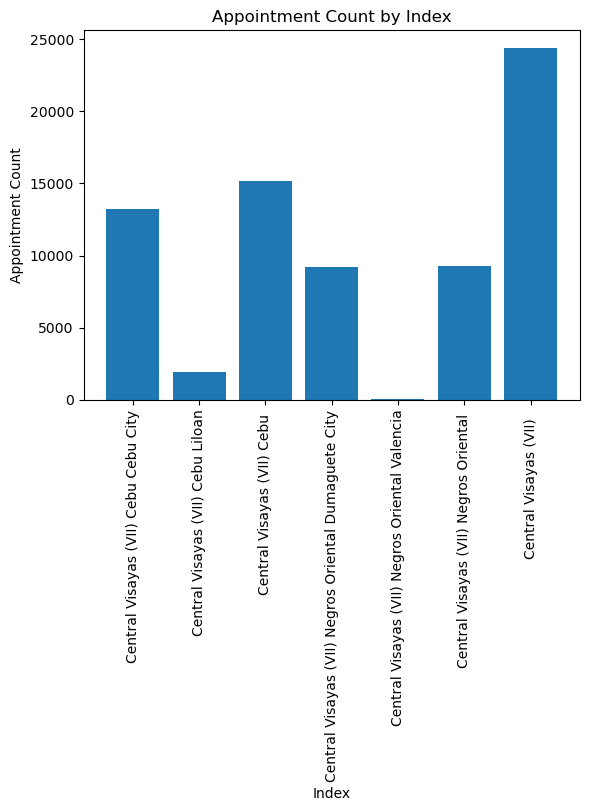

In [13]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'Central Visayas (VII)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for Central Visayas only')
plt.show()

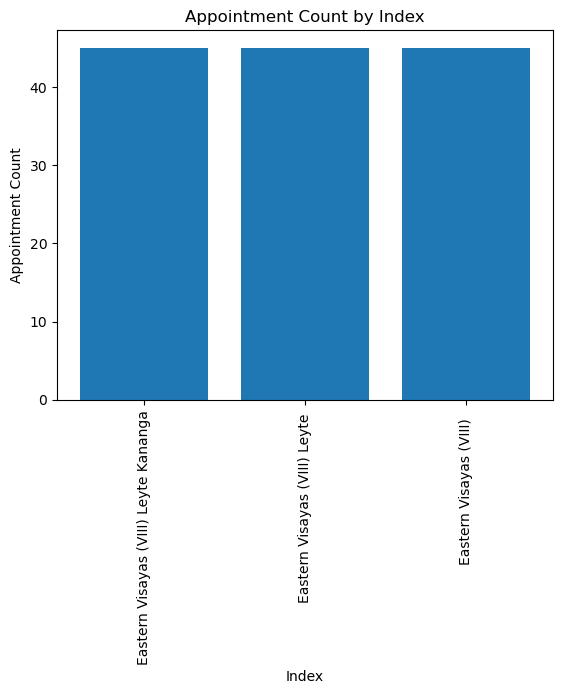

In [14]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'Eastern Visayas (VIII)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for Eastern Visayas only')
plt.show()

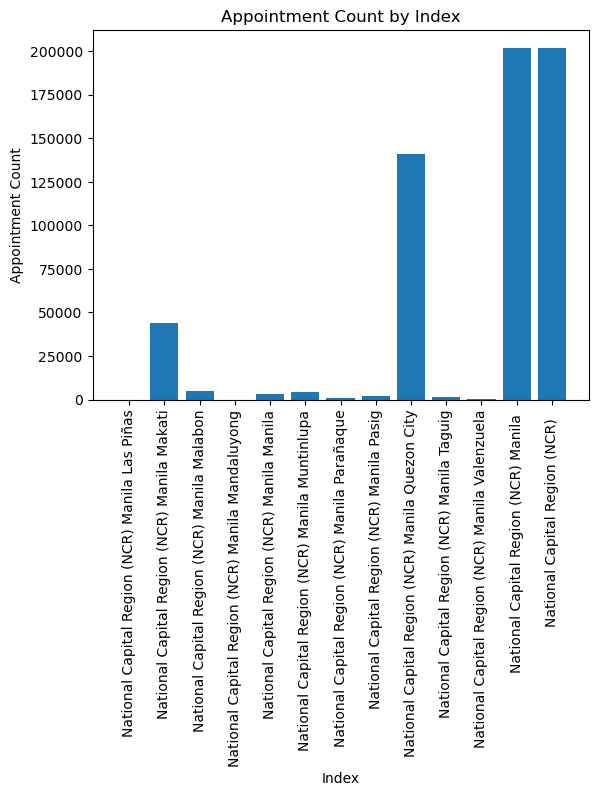

In [15]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'National Capital Region (NCR)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for National Capital Region only')
plt.show()

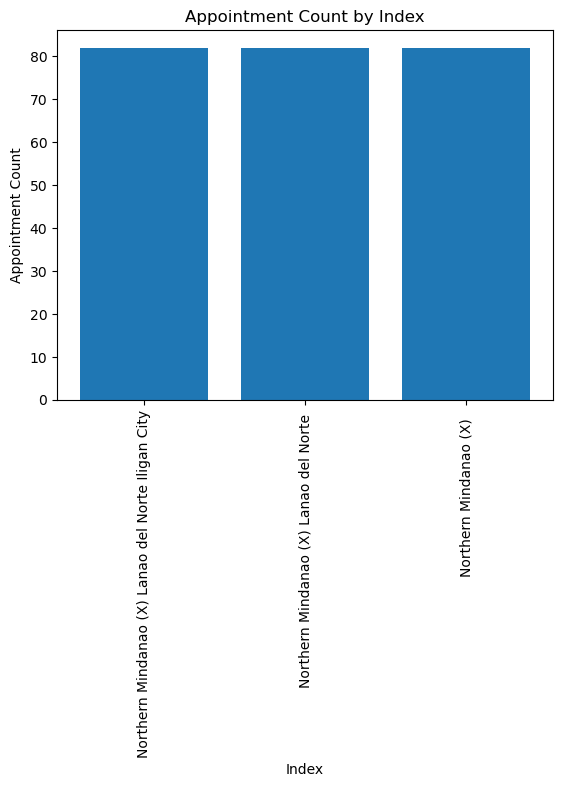

In [16]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'Northern Mindanao (X)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for Northern Mindanao only')
plt.show()

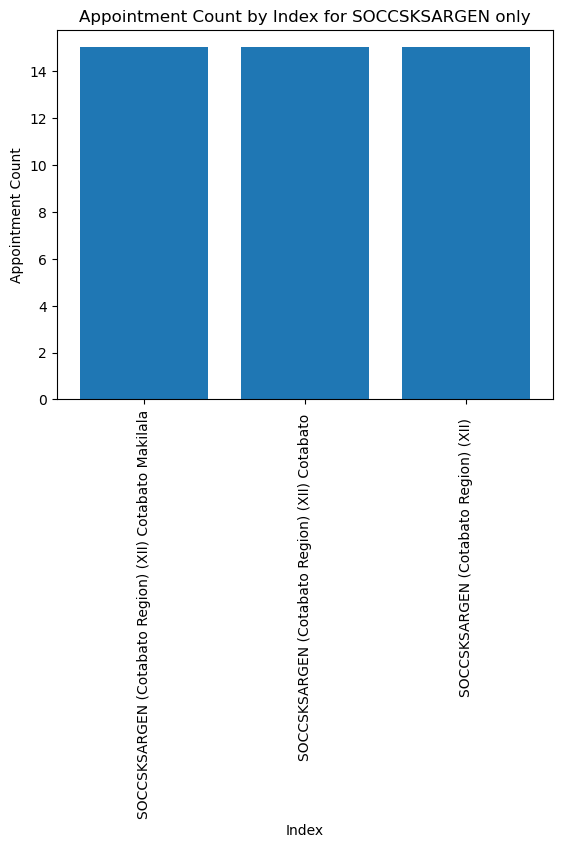

In [22]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'SOCCSKSARGEN (Cotabato Region) (XII)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for SOCCSKSARGEN only')
plt.show()

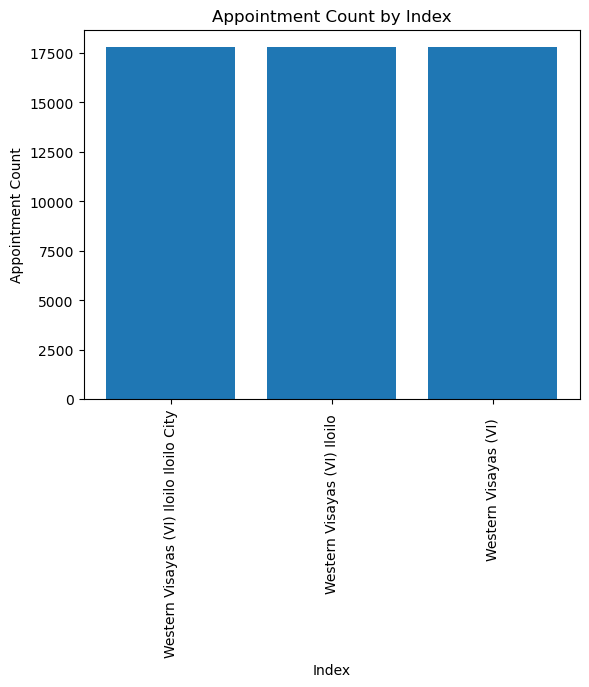

In [18]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'Western Visayas (VI)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for Western Visayas only')
plt.show()

# Slice: Count of appointments per given specific location/within a time period

In [27]:
query = """
    SELECT
    c.City,
    c.Province,
    a.QueueDate,
    COUNT(*) AS appointment_count
FROM appointments a
JOIN clinics c ON a.clinicid = c.clinicid
WHERE c.City = 'Manito'  -- Replace 'YourCity' with the desired city
   AND a.QueueDate BETWEEN '2019-01-01 00:0:00' AND '2022-12-31 00:00:00'  -- Replace with the desired time period
GROUP BY c.City, c.Province, a.QueueDate
ORDER BY appointment_count DESC;
"""
start_time = time.time()
OLAP_Query_2 = pd.read_sql_query(query, connection)
elapsed_time = time.time() - start_time

print(OLAP_Query_2.head(50))
print(f"Time taken to fetch data: {elapsed_time} seconds")

      City Province           QueueDate  appointment_count
0   Manito    Albay 2019-05-09 16:00:00                 22
1   Manito    Albay 2019-03-27 16:00:00                 16
2   Manito    Albay 2019-05-22 16:00:00                 13
3   Manito    Albay 2019-04-11 16:00:00                 12
4   Manito    Albay 2019-05-29 16:00:00                 12
5   Manito    Albay 2019-05-08 16:00:00                 10
6   Manito    Albay 2019-04-14 16:00:00                  9
7   Manito    Albay 2019-05-06 16:00:00                  9
8   Manito    Albay 2019-04-04 16:00:00                  8
9   Manito    Albay 2019-05-23 16:00:00                  8
10  Manito    Albay 2019-05-15 16:00:00                  8
11  Manito    Albay 2019-04-15 16:00:00                  8
12  Manito    Albay 2019-04-03 16:00:00                  6
13  Manito    Albay 2019-05-05 16:00:00                  6
14  Manito    Albay 2019-05-30 16:00:00                  4
15  Manito    Albay 2019-04-07 16:00:00                 

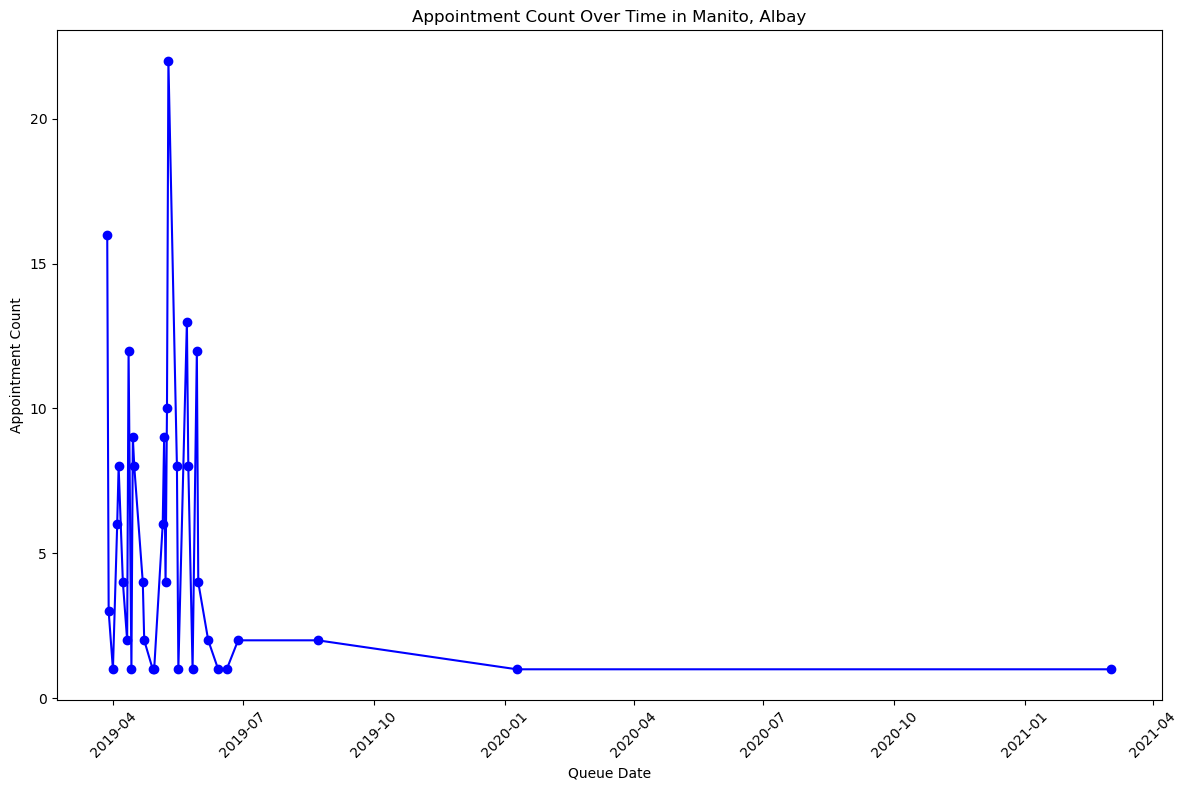

In [30]:
# Convert 'QueueDate' to datetime format
OLAP_Query_2['QueueDate'] = pd.to_datetime(OLAP_Query_2['QueueDate'])

# Sort the DataFrame by 'QueueDate'
OLAP_Query_2.sort_values(by='QueueDate', inplace=True)

# Plot Line Graph
plt.figure(figsize=(12, 8))
plt.plot(OLAP_Query_2['QueueDate'], OLAP_Query_2['appointment_count'], marker='o', linestyle='-', color='b')
plt.xlabel('Queue Date')
plt.ylabel('Appointment Count')
plt.title('Appointment Count Over Time in Manito, Albay')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [29]:
OLAP_Query_2

,City,Province,QueueDate,appointment_count
1,Manito,Albay,2019-03-27 16:00:00,16
18,Manito,Albay,2019-03-28 16:00:00,3
33,Manito,Albay,2019-03-31 16:00:00,1
12,Manito,Albay,2019-04-03 16:00:00,6
8,Manito,Albay,2019-04-04 16:00:00,8
15,Manito,Albay,2019-04-07 16:00:00,4
20,Manito,Albay,2019-04-10 16:00:00,2
3,Manito,Albay,2019-04-11 16:00:00,12
31,Manito,Albay,2019-04-13 16:00:00,1
6,Manito,Albay,2019-04-14 16:00:00,9
